In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
matplotlib.style.use('ggplot')
from __future__ import unicode_literals

In [ ]:
Data = pd.read_csv('review_peel.csv', encoding='utf-8')

In [ ]:
Data.head(20)

,Reviewer Name,Rating,Review,Date,Review_english
0,K,1 étoile,The food here has been consistently pretty bad...,il y a 5 mois,the food here has been consistently pretty bad...
1,Tiffany,4 étoiles,Service was good. The girl at counter was poli...,il y a 7 mois,service was good the girl at counter was polit...
2,Cassie Fast,1 étoile,I am a teacher and I purchased a dozen donuts ...,il y a 2 semaines,i am a teacher and i purchased a dozen donuts ...
3,Erica Ruffolo,1 étoile,"i come here every morning , im a loyal custome...",il y a 9 mois,i come here every morning im a loyal customer...
4,C. Yassine,3 étoiles,"Food was according Tom Horton standards 👍🏻, ho...",il y a 4 mois,food was according tom horton standards howev...
5,A Young,1 étoile,They didn’t had hot drinks just cold ones and ...,il y a 2 semaines,they didnt had hot drinks just cold ones and y...
6,Catherine,4 étoiles,"Great staff, great coffee ☕\nClean café to han...",il y a 4 mois,great staff great coffee \nclean café to hang ...
7,SINA Far,1 étoile,First time at this place and the last time!!!!...,il y a 10 mois,first time at this place and the last time\nun...
8,Eric Jodoin,1 étoile,"Pas beaucoup de personnel parle pas français, ...",il y a 4 mois,not many staff don't speak French so poor unde...
9,Saya Gofferaiw,3 étoiles,The service is sooooo bad almost every Tim Hor...,il y a 3 mois,the service is sooooo bad almost every tim hor...


In [ ]:
Data.columns

Index(['Reviewer Name', 'Rating', 'Review', 'Date', 'Review_english'], dtype='object')

In [ ]:
Data.dtypes

Reviewer Name     object
Rating            object
Review            object
Date              object
Review_english    object
dtype: object

In [ ]:
Reviews = Data['Review_english']
len(Reviews)

338

**Review Ranting**

In [ ]:
# Convert 'Rating' column to numeric, handling errors
Data['Rating'] = pd.to_numeric(Data['Rating'].str.replace('etoile', '').str.replace('étoiles', '').str.strip(), errors='coerce')

# Convert resulting numeric values to integers (NaN values will remain)
Data['Rating'] = Data['Rating'].astype('Int64', errors='ignore')

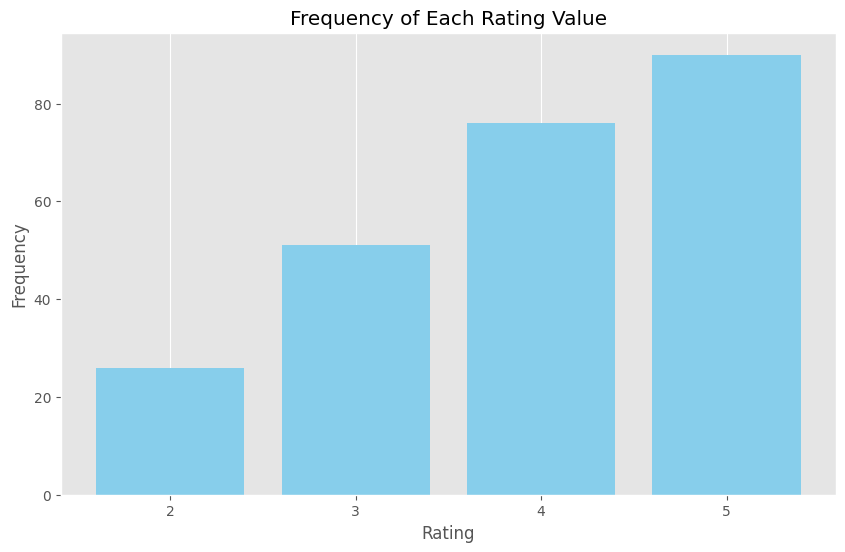

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency of each rating value
rating_counts = Data['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index.astype(int), rating_counts.values, color='skyblue') # Convert index to integers
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Each Rating Value')
plt.xticks(rating_counts.index.astype(int)) # Convert index to integers
plt.grid(axis='y')
plt.show()

In [ ]:
from transformers import pipeline

# Initialiser le pipeline de sentiment
sentiment_pipeline = pipeline("sentiment-analysis")

def get_sentiment_advanced(review):
    if isinstance(review, str):
        # Analyser le sentiment en utilisant le modèle avancé
        result = sentiment_pipeline(review)
        # Extraire l'étiquette de sentiment
        sentiment = result[0]['label']
        # Convertir en étiquettes 'Positive', 'Negative', 'Neutral'
        if sentiment == 'POSITIVE':
            return 'Positive'
        elif sentiment == 'NEGATIVE':
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral' # ou autre gestion des valeurs non textuelles

# Appliquer l'analyse de sentiment avancée à la colonne des avis
Data['Sentiment'] = Data['Review_english'].apply(get_sentiment_advanced)

# Calculer le pourcentage de chaque sentiment
sentiment_counts = Data['Sentiment'].value_counts(normalize=True) * 100

# Display the DataFrame
print("Sentiment Analysis Results:")
print(Data)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Sentiment Analysis Results:
                   Reviewer Name  Rating  \
0                              K    <NA>   
1                        Tiffany       4   
2                    Cassie Fast    <NA>   
3                  Erica Ruffolo    <NA>   
4                     C. Yassine       3   
..                           ...     ...   
333                     Chaly VG       4   
334  Massoterapia Com Resultados       3   
335                      susejal       3   
336             Cynthia Martinez       4   
337        percy mejia rodriguez       5   

                                                Review               Date  \
0    The food here has been consistently pretty bad...      il y a 5 mois   
1    Service was good. The girl at counter was poli...      il y a 7 mois   
2    I am a teacher and I purchased a dozen donuts ...  il y a 2 semaines   
3    i come here every morning , im a loyal custome...      il y a 9 mois   
4    Food was according Tom Horton standards 👍🏻, ho...    

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment
0,K,<NA>,The food here has been consistently pretty bad...,il y a 5 mois,the food here has been consistently pretty bad...,Negative
1,Tiffany,4,Service was good. The girl at counter was poli...,il y a 7 mois,service was good the girl at counter was polit...,Positive
2,Cassie Fast,<NA>,I am a teacher and I purchased a dozen donuts ...,il y a 2 semaines,i am a teacher and i purchased a dozen donuts ...,Negative
3,Erica Ruffolo,<NA>,"i come here every morning , im a loyal custome...",il y a 9 mois,i come here every morning im a loyal customer...,Positive
4,C. Yassine,3,"Food was according Tom Horton standards 👍🏻, ho...",il y a 4 mois,food was according tom horton standards howev...,Negative


In [ ]:
Data.to_csv('review_treated.csv',index=False)

In [ ]:
# Calculate the sentiment counts manually
positive_count = (Data['Sentiment'] == 'Positive').sum()
negative_count = (Data['Sentiment'] == 'Negative').sum()
neutral_count = (Data['Sentiment'] == 'Neutral').sum()
total_reviews = len(Data)

# Calculate percentages
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

positive_percentage, negative_percentage, neutral_percentage


(47.0414201183432, 52.662721893491124, 0.2958579881656805)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Handle potential non-string values in 'Review_French' column
all_reviews = ' '.join([str(review) for review in Data['Review_english']])

# Tokeniser les mots
words = all_reviews.split()

# Define stop words for French
stop_words = set(stopwords.words('english')) # Assuming you are working with French reviews

# Filtrer les mots pour enlever les stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Compter la fréquence des mots
word_counts = Counter(filtered_words)

# Afficher les 10 mots les plus fréquents
print(word_counts.most_common(10)) # Afficher les 10 mots les plus fréquents

# Enregistrer les résultats dans un fichier CSV
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# If you intend to add filtered words for each review, you'll need to adjust your approach.
# Here's one way to do it, but it depends on your specific goal:

Data['filtered_words'] = Data['Review_english'].apply(lambda review: [word for word in str(review).split() if word.lower() not in stop_words])

[('service', 93), ('good', 56), ('coffee', 56), ('tim', 55), ('place', 42), ('hortons', 35), ('staff', 34), ('order', 33), ('always', 33), ('food', 31)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


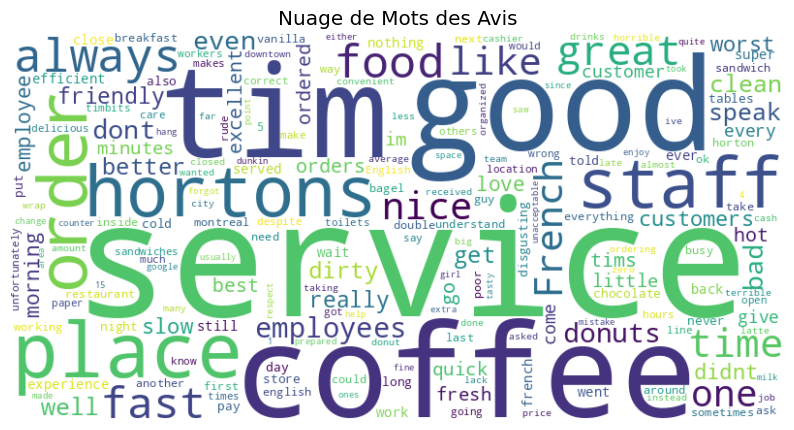

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Avis')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

def extract_nouns(review):
    if isinstance(review, str):
        # Create a TextBlob object
        blob = TextBlob(review)
        # Perform POS tagging
        pos_tags = blob.tags
        # Extract nouns (NN, NNS, NNP, NNPS)
        nouns = [word for word, pos in pos_tags if pos in [ 'NN', 'NNS']]
        print(nouns)
        return ' '.join(nouns)
    else:
        return ''
def correct_spelling(text):
    if isinstance(text, str): # Check if the input is a string
        blob= TextBlob(text)
        return str(blob.correct())
    else:
        return '' # Return an empty string if not a string

Data['Review_english'] = Data['Review_english'].apply(correct_spelling)
# Appliquer l'extraction des noms à la colonne des avis
Data['Nouns'] = Data['Review_english'].apply(extract_nouns)



['food', 'today', 'straw', 'i', 'coffin', 'mold']
['service', 'girl', 'counter', 'paper', 'bag', 'eyes', 'time', 'locations', 'limits', 'variety']
['i', 'teacher', 'i', 'dozen', 'donets', 'students', 'day', 'school', 'box', 'class', 'earning', 'i', 'way', 'i', 'box']
['i', 'morning', 'customer', 'i', 'staff', 'morning', 'i', 'dead', 'ice', 'cap', 'fly', 'raining', 'wasps']
['food', 'norton', 'standards', 'service', 'tourist', 'montreal']
['drinks', 'ones', 'purchase', 'donets', 'limits', 'store', 'dairy', 'i']
['staff', 'coffee', 'cafe', 'thing', 'door']
['time', 'place', 'time', 'beetles', 'wood', 'photo', 'wall']
['staff', 'understanding', 'orders', 'end', 'order', 'possibility', 'summer', 'fridge', 'milk', 'tim']
['service', 'tim', 'portions', 'feel', 'employees', 'teenager', 'respect', 'group', 'race', 'experience', 'employees', 'tim']
['client', 'team', 'portions', 'day', 'door', 'employees', 'comb', 'timatin', 'mistake']
['dirty', 'tim', 'portions', 'health', 'inspector', 'place'

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns
0,K,<NA>,The food here has been consistently pretty bad...,il y a 5 mois,the food here has been consistently pretty bad...,Negative,"[food, consistently, pretty, bad, today, last,...",food today straw i coffin mold
1,Tiffany,4,Service was good. The girl at counter was poli...,il y a 7 mois,service was good the girl at counter was polit...,Positive,"[service, good, girl, counter, polite, complai...",service girl counter paper bag eyes time locat...
2,Cassie Fast,<NA>,I am a teacher and I purchased a dozen donuts ...,il y a 2 semaines,i am a teacher and i purchased a dozen donets ...,Negative,"[teacher, purchased, dozen, donuts, students, ...",i teacher i dozen donets students day school b...
3,Erica Ruffolo,<NA>,"i come here every morning , im a loyal custome...",il y a 9 mois,i come here every morning in a loyal customer...,Positive,"[come, every, morning, im, loyal, customer, us...",i morning customer i staff morning i dead ice ...
4,C. Yassine,3,"Food was according Tom Horton standards 👍🏻, ho...",il y a 4 mois,food was according tom norton standards howev...,Negative,"[food, according, tom, horton, standards, howe...",food norton standards service tourist montreal


['service', 'coffee', 'i', 'place', 'tim', 'staff', 'time', 'portions', 'order', 'food', 'employees', 'donets', 'customers', 'morning', 'employee', 'dont', 'orders', 'minutes', 'nothing', 'customer', 'experience', 'tables', 'restaurant', 'store', 'dirty', 'night', 'chocolate', 'day', 'babel', 'vanilla', 'breakfast', 'way', 'everything', 'norton', 'times', 'guy', 'hours', 'paper', 'toilets', 'workers', 'one', 'others', 'location', 'line', 'limits', 'team', 'lack', 'drinks', 'addition', 'wrap', 'care', 'city', 'taste', 'cashier', 'price', 'cash', 'job', 'amount', 'work', 'sandwich', 'fast', 'wages', 'branch', 'montreal', 'ice', 'money', 'pay', 'mind', 'counter', 'slow', 'register', 'girl', 'point', 'organization', 'floor', 'milk', 'super', 'ones', 'meal', 'people', 'table', 'area', 'mistake', 'choice', 'front', 'rim', 'selection', 'language', 'love', 'something', 'shop', 'center', 'menu', 'space', 'bread', 'bit', 'convenient', 'teacher', 'mornings', 'doors', 'comb', 'services', 'cream', 

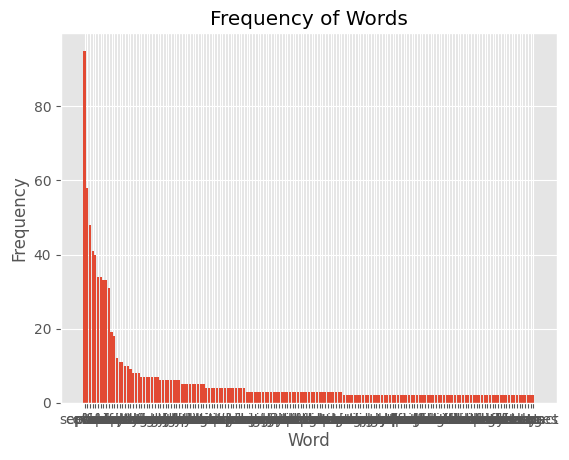

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the word counts for each word in the Nouns column
word_counts = pd.Series(' '.join(Data['Nouns']).split()).value_counts()

# Filter out words with count less than or equal to 1
# This addresses the original intent of the if statement
word_counts = word_counts[word_counts > 1]

# Sort the word counts in descending order
sorted_word_counts = word_counts.sort_values(ascending=False)
print(list( sorted_word_counts.index))
# Plot the word counts as a bar chart
plt.bar(sorted_word_counts.index, sorted_word_counts.values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequency of Words')
plt.show() # Added to display the plot

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialiser l'analyseur de sentiment VADER
analyzer = SentimentIntensityAnalyzer()

# Définir les mots-clés pour chaque catégorie
keywords = {
    'staff': ['staff','cashier','employees', 'employee', 'workers', 'service', 'attitude'],
    'cuisine': ['food','portions', 'cappuccino', 'chocolate','cuisine', 'repas', 'plat', 'coffee', 'drinks', 'breakfast', 'lunch', 'meal', 'milk','dinner','tea' ,'cinnamon','sandwich','express', 'vanilla','menu', 'taste'],
    'cleanliness': ['clean','bathroom','machine' ,'cockroaches','propreté', 'propre', 'sale', 'hygienic', 'dirty', 'cleaning','toilet'],

}

def get_sentiment_vader(text):
    if isinstance(text, str):
        # Analyse de sentiment avec VADER
        vs = analyzer.polarity_scores(text)
        # Déterminer le sentiment basé sur les scores de polarité
        if vs['compound'] >= 0.05:
            return 'Positive'
        elif vs['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def analyze_sentiment_by_category(data, keywords):
    for category, words in keywords.items():
        data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
        data[category + '_sentiment'] = data[category + '_filtered'].apply(get_sentiment_vader)
    return data

# Appliquer l'analyse de sentiment par catégorie
data = analyze_sentiment_by_category(Data, keywords)

# Afficher les résultats
print("Sentiment Analysis Results:")
print(Data.head())

# Sauvegarder les résultats dans un nouveau fichier CSV
output_file_path = 'review_with_sentiment_by_category.csv'
data.to_csv(output_file_path, index=False)


Sentiment Analysis Results:
   Reviewer Name  Rating                                             Review  \
0              K    <NA>  The food here has been consistently pretty bad...   
1        Tiffany       4  Service was good. The girl at counter was poli...   
2    Cassie Fast    <NA>  I am a teacher and I purchased a dozen donuts ...   
3  Erica Ruffolo    <NA>  i come here every morning , im a loyal custome...   
4     C. Yassine       3  Food was according Tom Horton standards 👍🏻, ho...   

                Date                                     Review_english  \
0      il y a 5 mois  the food here has been consistently pretty bad...   
1      il y a 7 mois  service was good the girl at counter was polit...   
2  il y a 2 semaines  i am a teacher and i purchased a dozen donets ...   
3      il y a 9 mois  i come here every morning  in a loyal customer...   
4      il y a 4 mois  food was according tom norton standards  howev...   

  Sentiment                                   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


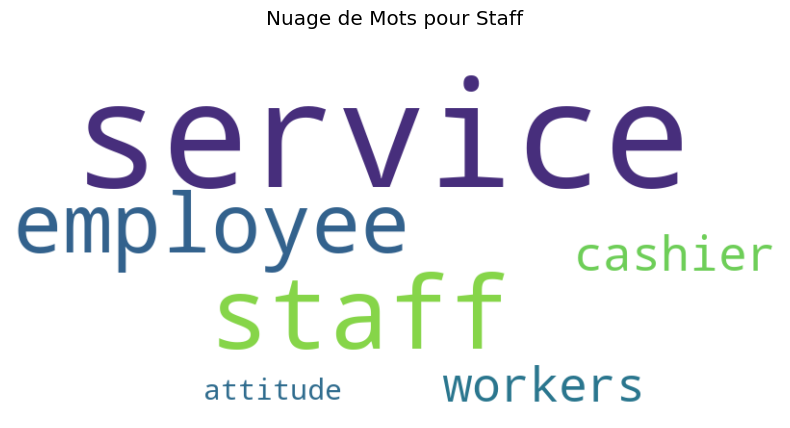

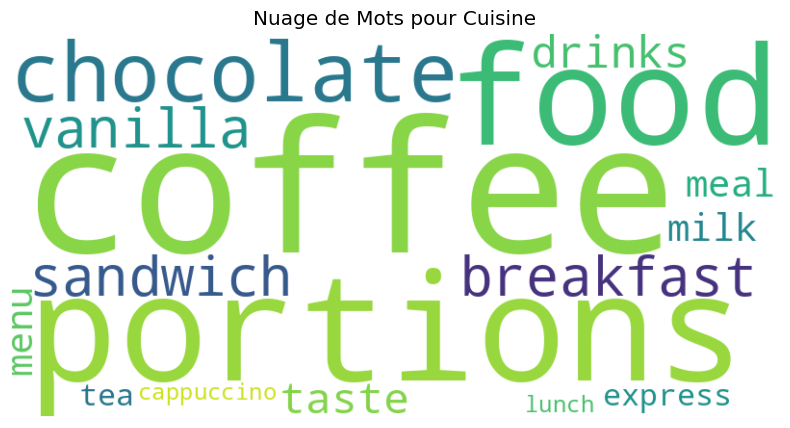

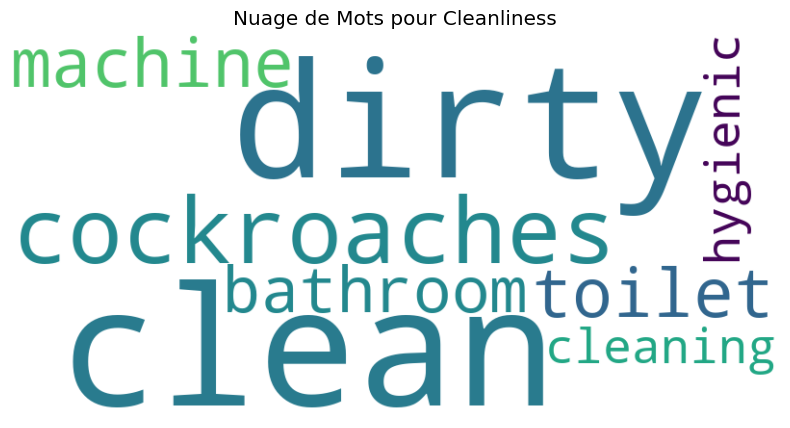

In [ ]:
def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filtrer les avis par catégorie et générer les nuages de mots
for category, words in keywords.items():
    data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
    category_text = ' '.join(data[category + '_filtered'])
    generate_wordcloud(category_text, f'Nuage de Mots pour {category.capitalize()}')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


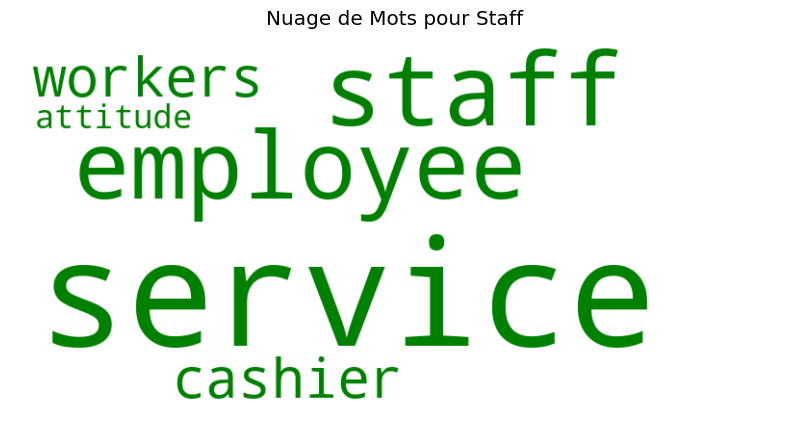

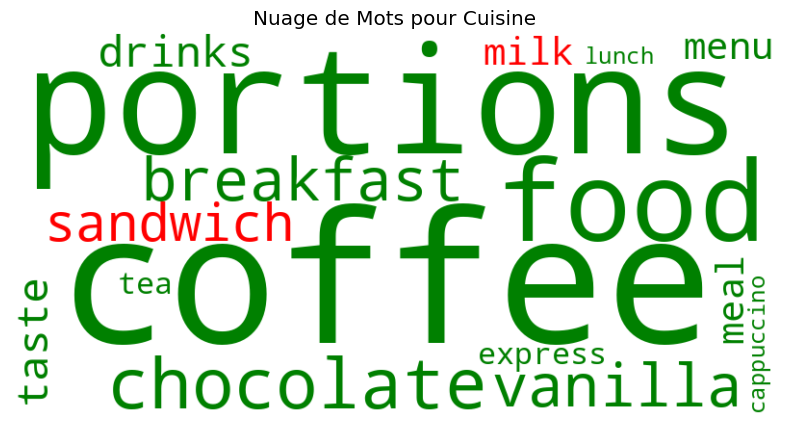

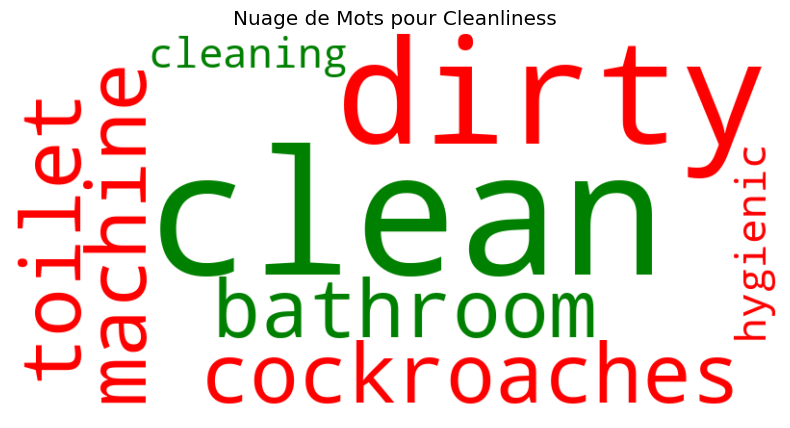

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
# Initialiser le pipeline de sentiment
sentiment_pipeline = pipeline("sentiment-analysis")
def filter_reviews_by_keywords(review, keywords):
    words = review.split()
    filtered_review = ' '.join([word for word in words if word.lower() in keywords])
    return filtered_review

def analyze_word_sentiment(word):
    result = sentiment_pipeline(word)
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

def generate_color(word, font_size, position, orientation, random_state=None, **kwargs): # Added necessary parameters
    sentiment = analyze_word_sentiment(word)
    if sentiment == 'Positive':
        return 'green'
    elif sentiment == 'Negative':
        return 'red'
    else:
        return 'gray'

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud.recolor(color_func=generate_color), interpolation='bilinear') # Removed sentiment_scores
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filtrer les avis par catégorie et générer les nuages de mots
for category, words in keywords.items():
    data[category + '_filtered'] = data['Review_english'].apply(lambda review: filter_reviews_by_keywords(review, words))
    category_text = ' '.join(data[category + '_filtered'])
    generate_wordcloud(category_text, f'Nuage de Mots pour {category.capitalize()}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


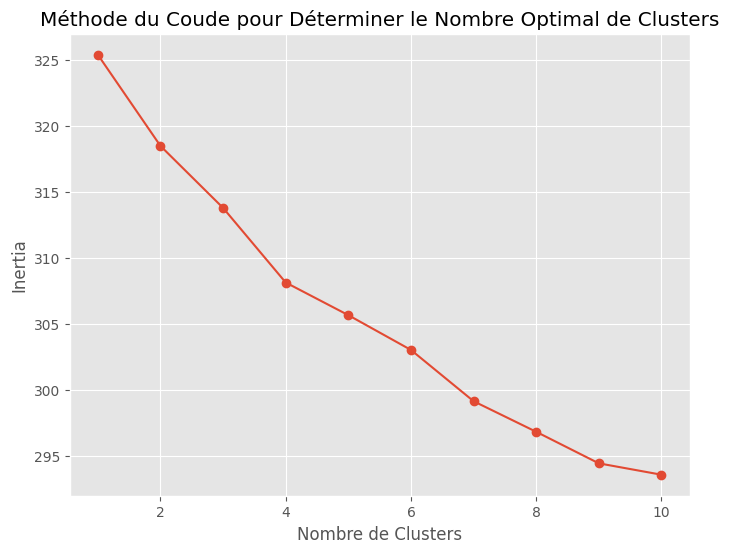

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text


Data['Cleaned Review'] = Data['Review_english'].apply(lambda x: clean_text(str(x)))

# Transformer les avis en vecteurs TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Data['Cleaned Review'])

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertia')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()



Cluster 0 mots-clés : ['speak', 'dont', 'served', 'best', 'dirty', 'time', 'service', 'place', 'order', 'french']
Cluster 1 mots-clés : ['time', 'quick', 'morning', 'donets', 'food', 'place', 'excellent', 'service', 'coffee', 'great']
Cluster 2 mots-clés : ['just', 'better', 'norton', 'staff', 'clean', 'service', 'worst', 'like', 'portions', 'tim']
Cluster 3 mots-clés : ['clean', 'warm', 'excellent', 'drinks', 'good', 'super', 'staff', 'service', 'nice', 'fast']
Cluster 4 mots-clés : ['love', 'menu', 'usual', 'slow', 'staff', 'food', 'place', 'service', 'coffee', 'good']


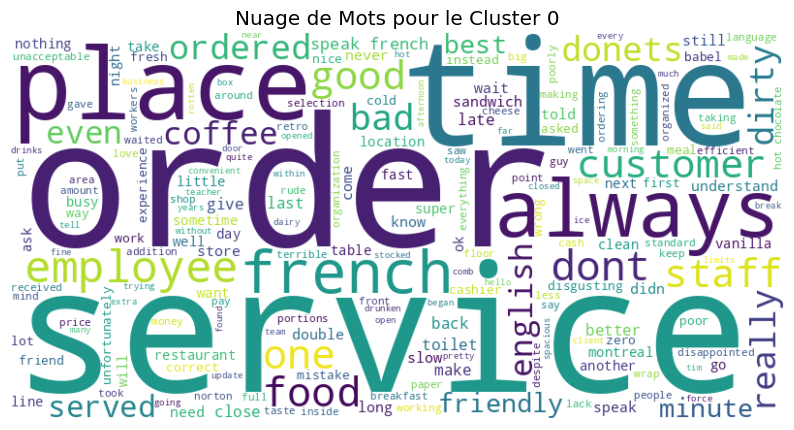

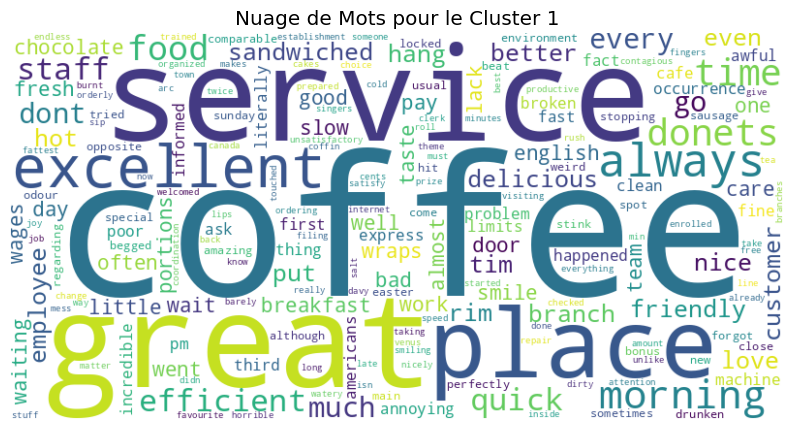

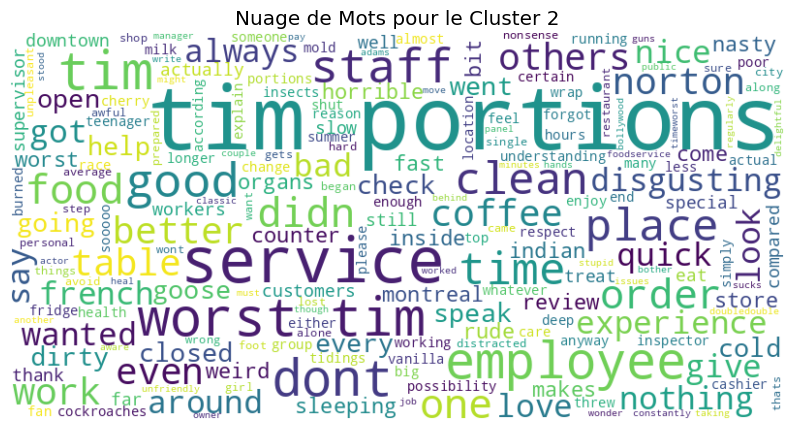

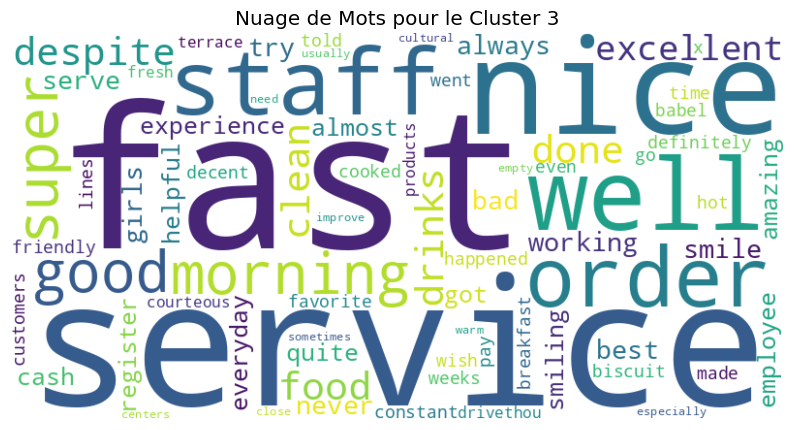

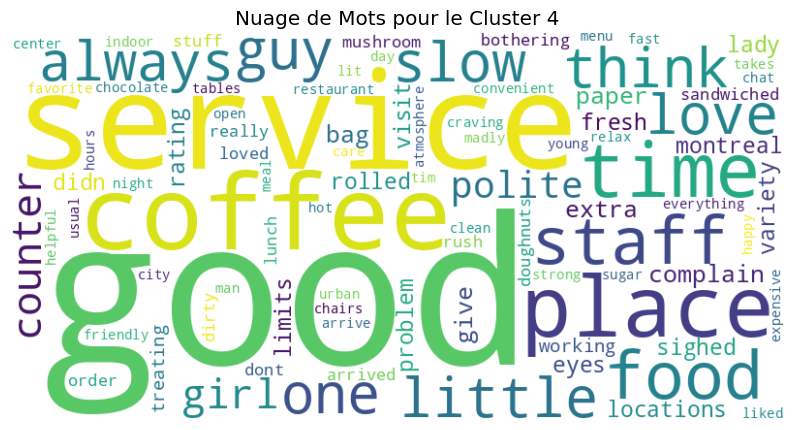

In [ ]:
# Appliquer K-means avec le nombre optimal de clusters (par exemple, 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Data['Cluster'] = kmeans.fit_predict(X)

# Afficher les mots-clés pour chaque cluster
terms = vectorizer.get_feature_names_out()
for i in range(optimal_clusters):
    centroid_terms = kmeans.cluster_centers_[i].argsort()[-10:]
    print(f"Cluster {i} mots-clés : {[terms[ind] for ind in centroid_terms]}")

# Créer un nuage de mots pour chaque cluster
for i in range(optimal_clusters):
    cluster_reviews = Data[Data['Cluster'] == i]['Cleaned Review']
    all_text = ' '.join(cluster_reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuage de Mots pour le Cluster {i}')
    plt.show()

In [ ]:
Data.head()

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns,staff_filtered,staff_sentiment,cuisine_filtered,cuisine_sentiment,cleanliness_filtered,cleanliness_sentiment,Cleaned Review,Cluster
0,K,<NA>,The food here has been consistently pretty bad...,il y a 5 mois,the food here has been consistently pretty bad...,Negative,"[food, consistently, pretty, bad, today, last,...",food today straw i coffin mold,,Neutral,food,Neutral,,Neutral,the food here has been consistently pretty bad...,0
1,Tiffany,4,Service was good. The girl at counter was poli...,il y a 7 mois,service was good the girl at counter was polit...,Positive,"[service, good, girl, counter, polite, complai...",service girl counter paper bag eyes time locat...,service,Neutral,,Neutral,,Neutral,service was good the girl at counter was polit...,4
2,Cassie Fast,<NA>,I am a teacher and I purchased a dozen donuts ...,il y a 2 semaines,i am a teacher and i purchased a dozen donets ...,Negative,"[teacher, purchased, dozen, donuts, students, ...",i teacher i dozen donets students day school b...,,Neutral,,Neutral,,Neutral,i am a teacher and i purchased a dozen donets ...,0
3,Erica Ruffolo,<NA>,"i come here every morning , im a loyal custome...",il y a 9 mois,i come here every morning in a loyal customer...,Positive,"[come, every, morning, im, loyal, customer, us...",i morning customer i staff morning i dead ice ...,staff,Neutral,,Neutral,,Neutral,i come here every morning in a loyal customer...,0
4,C. Yassine,3,"Food was according Tom Horton standards 👍🏻, ho...",il y a 4 mois,food was according tom norton standards howev...,Negative,"[food, according, tom, horton, standards, howe...",food norton standards service tourist montreal,service,Neutral,food,Neutral,,Neutral,food was according tom norton standards howev...,0


In [ ]:
Data[['Rating','Cluster']].corr()

,Rating,Cluster
Rating,1.000000,0.204869
Cluster,0.204869,1.000000


Classifier les avis en positifs ou négatifs selon la date,

In [ ]:

from datetime import datetime
from transformers import pipeline

# Charger le modèle pré-entraîné pour l'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis")

# Fonction pour déterminer le sentiment
def get_sentiment(review):
    result = sentiment_analysis(review[:512])  # Limiter à 512 tokens
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import pandas as pd
import re
from datetime import datetime, timedelta

# Fonction pour convertir les dates en jours
def convert_to_days(date_str):
    # Remplacer 'un' par '1'
    date_str = date_str.replace('un', '1').replace('une', '1')

    today = datetime.now()

    match = re.search(r'(\d+)\s*(jour|jours|mois|an|année|années)', date_str)
    if match:
        num = int(match.group(1))
        unit = match.group(2)

        if 'jour' in unit:
            return num
        elif 'mois' in unit:
            past_date = today - pd.DateOffset(months=num)
            return (today - past_date).days
        elif 'an' in unit or 'année' in unit or 'années' in unit:
            return num * 365
    return None

In [ ]:
Data['Date_in_days'] = Data['Date'].apply(convert_to_days)


In [ ]:
Data.head(20)

,Reviewer Name,Rating,Review,Date,Review_english,Sentiment,filtered_words,Nouns,staff_filtered,staff_sentiment,cuisine_filtered,cuisine_sentiment,cleanliness_filtered,cleanliness_sentiment,Cleaned Review,Cluster,Date_in_days
0,K,<NA>,The food here has been consistently pretty bad...,il y a 5 mois,the food here has been consistently pretty bad...,Negative,"[food, consistently, pretty, bad, today, last,...",food today straw i coffin mold,,Neutral,food,Neutral,,Neutral,the food here has been consistently pretty bad...,0,152.0
1,Tiffany,4,Service was good. The girl at counter was poli...,il y a 7 mois,service was good the girl at counter was polit...,Positive,"[service, good, girl, counter, polite, complai...",service girl counter paper bag eyes time locat...,service,Neutral,,Neutral,,Neutral,service was good the girl at counter was polit...,4,213.0
2,Cassie Fast,<NA>,I am a teacher and I purchased a dozen donuts ...,il y a 2 semaines,i am a teacher and i purchased a dozen donets ...,Negative,"[teacher, purchased, dozen, donuts, students, ...",i teacher i dozen donets students day school b...,,Neutral,,Neutral,,Neutral,i am a teacher and i purchased a dozen donets ...,0,NaN
3,Erica Ruffolo,<NA>,"i come here every morning , im a loyal custome...",il y a 9 mois,i come here every morning in a loyal customer...,Positive,"[come, every, morning, im, loyal, customer, us...",i morning customer i staff morning i dead ice ...,staff,Neutral,,Neutral,,Neutral,i come here every morning in a loyal customer...,0,274.0
4,C. Yassine,3,"Food was according Tom Horton standards 👍🏻, ho...",il y a 4 mois,food was according tom norton standards howev...,Negative,"[food, according, tom, horton, standards, howe...",food norton standards service tourist montreal,service,Neutral,food,Neutral,,Neutral,food was according tom norton standards howev...,0,122.0
5,A Young,<NA>,They didn’t had hot drinks just cold ones and ...,il y a 2 semaines,they didn had hot drinks just cold ones and ye...,Negative,"[didnt, hot, drinks, cold, ones, yet, told, us...",drinks ones purchase donets limits store dairy i,,Neutral,drinks,Neutral,,Neutral,they didn had hot drinks just cold ones and ye...,0,NaN
6,Catherine,4,"Great staff, great coffee ☕\nClean café to han...",il y a 4 mois,great staff great coffee \nclean cafe to hang ...,Positive,"[great, staff, great, coffee, clean, café, han...",staff coffee cafe thing door,staff,Neutral,coffee,Neutral,clean,Positive,great staff great coffee \nclean cafe to hang ...,1,122.0
7,SINA Far,<NA>,First time at this place and the last time!!!!...,il y a 10 mois,first time at this place and the last time\nun...,Negative,"[first, time, place, last, time, unfortunately...",time place time beetles wood photo wall,,Neutral,,Neutral,,Neutral,first time at this place and the last time\nun...,0,305.0
8,Eric Jodoin,<NA>,"Pas beaucoup de personnel parle pas français, ...",il y a 4 mois,not many staff don't speak French so poor unde...,Negative,"[many, staff, speak, French, poor, understandi...",staff understanding orders end order possibili...,staff,Neutral,milk portions,Neutral,,Neutral,not many staff dont speak french so poor under...,2,122.0
9,Saya Gofferaiw,3,The service is sooooo bad almost every Tim Hor...,il y a 3 mois,the service is sooooo bad almost every tim por...,Negative,"[service, sooooo, bad, almost, every, tim, hor...",service tim portions feel employees teenager r...,service employees employees,Neutral,portions,Neutral,,Neutral,the service is sooooo bad almost every tim por...,2,92.0


In [ ]:

# Fonction pour déterminer le sentiment
def get_sentiment(review):
    result = sentiment_analysis(review[:512])  # Limiter à 512 tokens
    sentiment = result[0]['label']
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

# Ajouter une colonne pour le sentiment
Data['Sentiment'] = Data['Review'].apply(get_sentiment)

# Vérifier le type de données de la colonne 'Date_in_days'
print(Data['Date_in_days'])

# Classifier les avis par jour
reviews_by_date_sorted = Data.groupby('Date_in_days').apply(lambda x: x['Sentiment'].value_counts()).unstack().fillna(0).sort_index()
print(reviews_by_date_sorted)
# Enregistrer les résultats dans un nouveau fichier CSV
output_file_path = 'reviews_by_date.csv'
reviews_by_date_sorted.to_csv(output_file_path)

print('Les avis ont été classés par date et enregistrés dans le fichier reviews_by_date.csv')

0       152.0
1       213.0
2         NaN
3       274.0
4       122.0
        ...  
333    1460.0
334     365.0
335    1825.0
336     730.0
337    1095.0
Name: Date_in_days, Length: 338, dtype: float64
Sentiment     Negative  Positive
Date_in_days                    
31.0               1.0       2.0
61.0               3.0       1.0
92.0               3.0       0.0
122.0              4.0       0.0
152.0              1.0       0.0
183.0              1.0       0.0
213.0              0.0       1.0
244.0              1.0       1.0
274.0              7.0       2.0
305.0              5.0       1.0
336.0              3.0       2.0
365.0             32.0      25.0
730.0             24.0      17.0
1095.0             9.0       4.0
1460.0            22.0      25.0
1825.0            11.0      28.0
2190.0            16.0      29.0
2555.0            19.0      23.0
2920.0             3.0       8.0
Les avis ont été classés par date et enregistrés dans le fichier reviews_by_date.csv


In [ ]:
reviews_by_date_sorted.index

Index([  31.0,   61.0,   92.0,  122.0,  152.0,  183.0,  213.0,  244.0,  274.0,
        305.0,  336.0,  365.0,  730.0, 1095.0, 1460.0, 1825.0, 2190.0, 2555.0,
       2920.0],
      dtype='float64', name='Date_in_days')

<Figure size 1200x600 with 0 Axes>

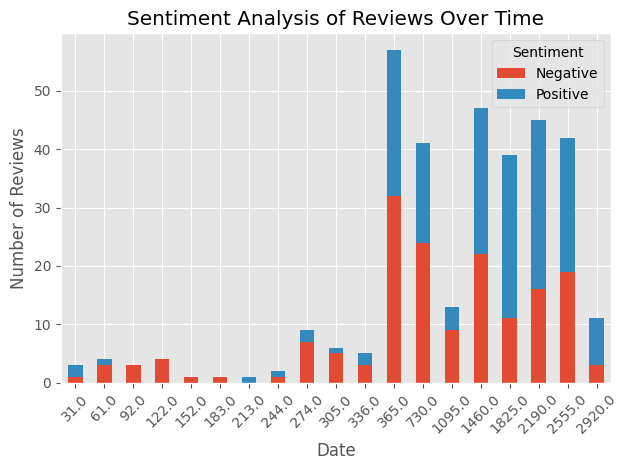

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
reviews_by_date_sorted.plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

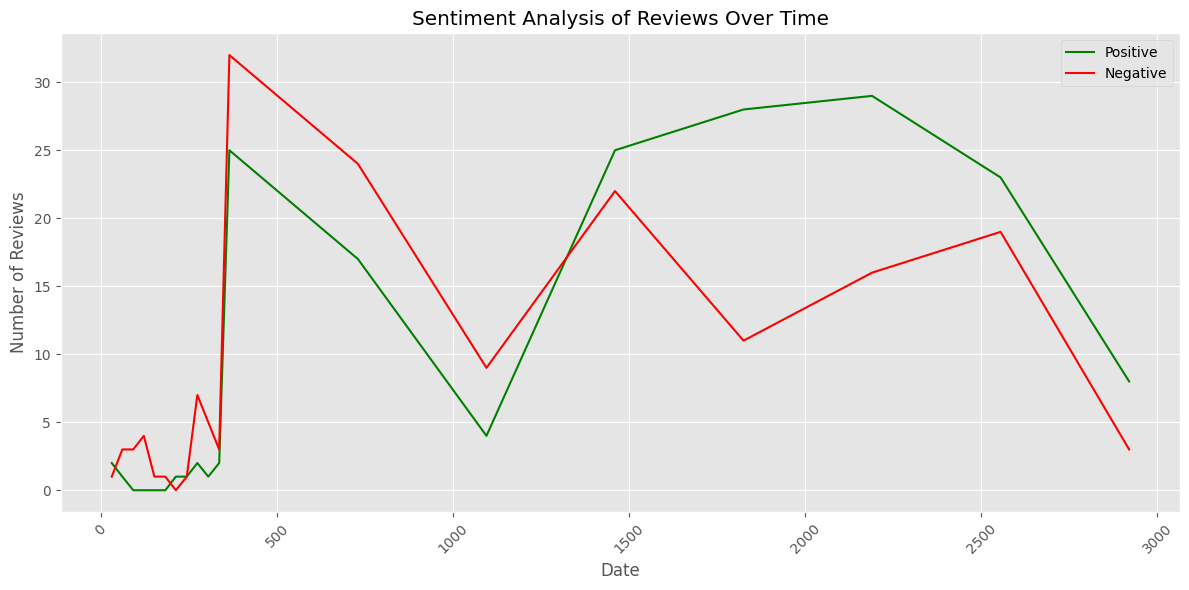

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(reviews_by_date_sorted.index, reviews_by_date_sorted['Positive'], label='Positive', color='green')
plt.plot(reviews_by_date_sorted.index, reviews_by_date_sorted['Negative'], label='Negative', color='red')
plt.xlabel('Date')  # Changed label to reflect datetime index
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()